# Fake Job Post Predition

## 1. Install, Configure, Setup Kaggle

This initial section is crucial for preparing the notebook's environment. It involves installing external libraries not included by default and importing all necessary modules that will be used throughout the data analysis, modeling, and evaluation pipeline.

In [ ]:
!pip install kaggle
!pip install xgboost

import os
from google.colab import files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

sns.set_style('whitegrid')

print("Libraries have been successfully imported.")

Libraries have been successfully imported.


## 2. Kaggle API Configuration

To download the project dataset, you must first authenticate with your Kaggle account.

**Instructions:**
1.  Go to your Kaggle account page: **[https://www.kaggle.com/account](https://www.kaggle.com/account)**
2.  Scroll to the **API** section and click **"Create New API Token"** to download your `kaggle.json` file.
3.  Run the code cell below and use the "Choose Files" button to upload the `kaggle.json` file you just downloaded.

In [ ]:
if not os.path.exists('/root/.kaggle'):
    os.makedirs('/root/.kaggle')

print("Please upload your kaggle.json file:")
files.upload()

!mv kaggle.json /root/.kaggle/kaggle.json

!chmod 600 /root/.kaggle/kaggle.json

print("kaggle.json has been successfully uploaded and configured.")

Please upload your kaggle.json file:


Saving kaggle.json to kaggle.json
kaggle.json has been successfully uploaded and configured.


## 3. Data Loading and Initial Exploration

Now we will download the dataset directly from Kaggle, unzip it, and load it into a Pandas DataFrame. We'll then perform an initial exploration to understand its structure and identify any issues like missing values.

- **Dataset Source:** [Real or Fake? Fake Job Posting Prediction](https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction)

This section is dedicated to acquiring the dataset and performing an initial Exploratory Data Analysis (EDA). The primary goals here are to programmatically download the data using the Kaggle API, load it into a structured format using pandas, and conduct a preliminary investigation to understand its fundamental properties. This initial check is vital for identifying potential challenges, such as missing data or imbalanced classes, which will heavily influence the subsequent preprocessing and modeling strategies.

In [ ]:
!kaggle datasets download -d shivamb/real-or-fake-fake-jobposting-prediction

!unzip \*.zip && rm *.zip

print("Dataset has been successfully downloaded and unzipped.")

Dataset URL: https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction
License(s): CC0-1.0
  0% 0.00/16.1M [00:00<?, ?B/s]
100% 16.1M/16.1M [00:00<00:00, 700MB/s]
Archive:  real-or-fake-fake-jobposting-prediction.zip
replace fake_job_postings.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: fake_job_postings.csv   
Dataset has been successfully downloaded and unzipped.


In [ ]:
df = pd.read_csv('fake_job_postings.csv')

print("First 10 rows of the dataset:")
display(df.head(10))

First 10 rows of the dataset:


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,NaN,NaN,NaN,NaN,NaN,0
8,9,HP BSM SME,"US, FL, Pensacola",NaN,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,1,Full-time,Associate,NaN,Information Technology and Services,NaN,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


In [ ]:
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-n

In [ ]:
print("\nDistribution of fraudulent vs. real job postings:")
print(df['fraudulent'].value_counts())


Distribution of fraudulent vs. real job postings:
fraudulent
0    17014
1      866
Name: count, dtype: int64


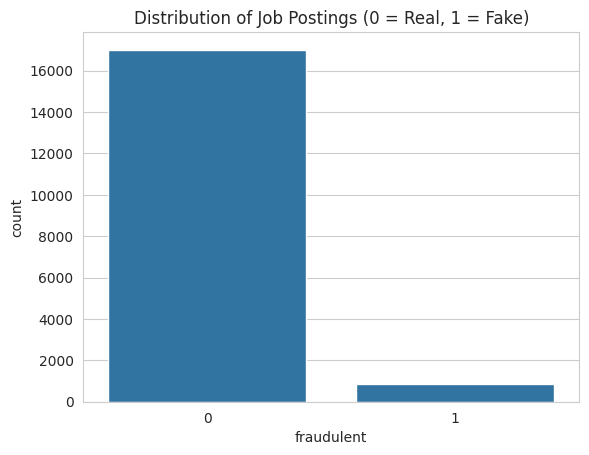

In [ ]:
sns.countplot(x='fraudulent', data=df)
plt.title('Distribution of Job Postings (0 = Real, 1 = Fake)')
plt.show()

## 4. Data Preprocessing and Feature Engineering

- Feature engineering
- Data Cleaning
- Plain text to numerical vectors using TF-IDF

This stage transforms the raw data into a clean, vectorized format suitable for machine learning. The primary strategy involves engineering a single, comprehensive text feature (combined_text) by consolidating multiple columns. This feature is then converted into a numerical matrix using the TF-IDF (Term Frequency-Inverse Document Frequency) technique, which represents words based on their relative importance.


In [ ]:
# --- Feature Engineering: Combine text columns ---
# We'll combine several text fields into one comprehensive 'text' feature for our model.
# This captures more context than any single column.
text_features = ['title', 'department', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']

# Fill any missing values in these columns with an empty string ' '
for col in text_features:
    df[col] = df[col].fillna(' ')

# Concatenate the text features into a single column
df['combined_text'] = df[text_features].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

print("Combined text feature created.")
display(df[['fraudulent', 'combined_text']].head(10))

Combined text feature created.


,fraudulent,combined_text
0,0,"Marketing Intern Marketing We're Food52, and w..."
1,0,Customer Service - Cloud Video Production Succ...
2,0,Commissioning Machinery Assistant (CMA) Valo...
3,0,Account Executive - Washington DC Sales Our pa...
4,0,Bill Review Manager SpotSource Solutions LLC...
5,0,Accounting Clerk Job OverviewApex is an en...
6,0,Head of Content (m/f) ANDROIDPIT Founded in 20...
7,0,Lead Guest Service Specialist Airenvy’s m...
8,0,HP BSM SME Solutions3 is a woman-owned small...
9,0,Customer Service Associate - Part Time Novi...


## 5. Text Vectorization and Data Splitting

Machine learning models require numerical input. We'll use **TF-IDF (Term Frequency-Inverse Document Frequency)** to convert our `combined_text` feature into a numerical matrix.

We will then split our data into training and testing sets. We use `stratify=y` to ensure the proportion of fraudulent jobs is the same in both the training and testing sets, which is crucial for imbalanced datasets.

In [ ]:
# --- Data Cleaning & Preparation for Modeling ---

# Define our feature (X) and target (y)
X = df['combined_text']
y = df['fraudulent']

# Convert the text data into numerical vectors using TF-IDF
# TF-IDF is a standard technique for processing text.
# It converts text into a matrix of numbers that represents the importance of each word.
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1500)
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)
# 'stratify=y' is important for imbalanced datasets. It ensures the train and test sets have
# a similar proportion of fraudulent postings as the original dataset.

print("Data has been vectorized and split into training and testing sets.")
print(f"Shape of training data: {X_train.shape}")
print(f"Shape of testing data: {X_test.shape}")

Data has been vectorized and split into training and testing sets.
Shape of training data: (14304, 1500)
Shape of testing data: (3576, 1500)


## 6. Model Training and Evaluation

We will Train the model using 6 different algorithms:
- `Logistic Regression`
- `K-Nearest Neighbors`
- `Decision Tree`
- `Random Forest`
- `Support Vector Machine`
- `XGBoost`

We will now train and evaluate six different classification models. For each model, we use `class_weight='balanced'` (or its equivalent) to handle the imbalanced dataset by forcing the model to pay more attention to the minority class (fake jobs).

This section focuses on training a diverse set of six machine learning models to identify the most effective one for this classification task. A key aspect of this phase is addressing the severe class imbalance discovered during EDA. This is achieved by applying class weighting techniques (class_weight='balanced' and scale_pos_weight), which force the models to pay more attention to the minority class (fraudulent postings) during training, thereby improving their ability to detect fraud.

In [ ]:
neg_count = y_train.value_counts()[0]
pos_count = y_train.value_counts()[1]
scale_pos_weight_value = neg_count / pos_count

# Initialize the models
# We use class_weight='balanced' to help the models handle the imbalanced dataset.
# This automatically adjusts weights inversely proportional to class frequencies.
models = {
    "Logistic Regression": LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100),
    "Support Vector Machine": SVC(random_state=42, class_weight='balanced', probability=True),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight_value)
}

results = {}

for name, model in models.items():
    print(f"--- Training {name} ---")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store the results
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}

    print(f"Results for {name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}\n")

print("All models trained and evaluated successfully.")

--- Training Logistic Regression ---
Results for Logistic Regression:
  Accuracy: 0.9547
  Precision: 0.5185
  Recall: 0.8902
  F1-Score: 0.6553

--- Training K-Nearest Neighbors ---
Results for K-Nearest Neighbors:
  Accuracy: 0.9790
  Precision: 0.8603
  Recall: 0.6763
  F1-Score: 0.7573

--- Training Decision Tree ---
Results for Decision Tree:
  Accuracy: 0.9634
  Precision: 0.6235
  Recall: 0.6127
  F1-Score: 0.6181

--- Training Random Forest ---
Results for Random Forest:
  Accuracy: 0.9760
  Precision: 0.9780
  Recall: 0.5145
  F1-Score: 0.6742

--- Training Support Vector Machine ---
Results for Support Vector Machine:
  Accuracy: 0.9869
  Precision: 0.9701
  Recall: 0.7514
  F1-Score: 0.8469

--- Training XGBoost ---


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:12:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Results for XGBoost:
  Accuracy: 0.9849
  Precision: 0.8940
  Recall: 0.7803
  F1-Score: 0.8333

All models trained and evaluated successfully.


## 7. Model Comparison and Selection

This section provides a data-driven comparison of the trained models. The performance metrics (Accuracy, Precision, Recall, F1-Score) are compiled into a DataFrame, sorted, and visualized. The best model is programmatically selected based on the highest F1-Score, as it offers a balanced measure of precision and recall, which is the most appropriate metric for this imbalanced classification problem.

Model Performance Comparison:


,Accuracy,Precision,Recall,F1-Score
Support Vector Machine,0.986857,0.970149,0.751445,0.846906
XGBoost,0.984899,0.894040,0.780347,0.833333
K-Nearest Neighbors,0.979027,0.860294,0.676301,0.757282
Random Forest,0.975951,0.978022,0.514451,0.674242
Logistic Regression,0.954698,0.518519,0.890173,0.655319
Decision Tree,0.963367,0.623529,0.612717,0.618076


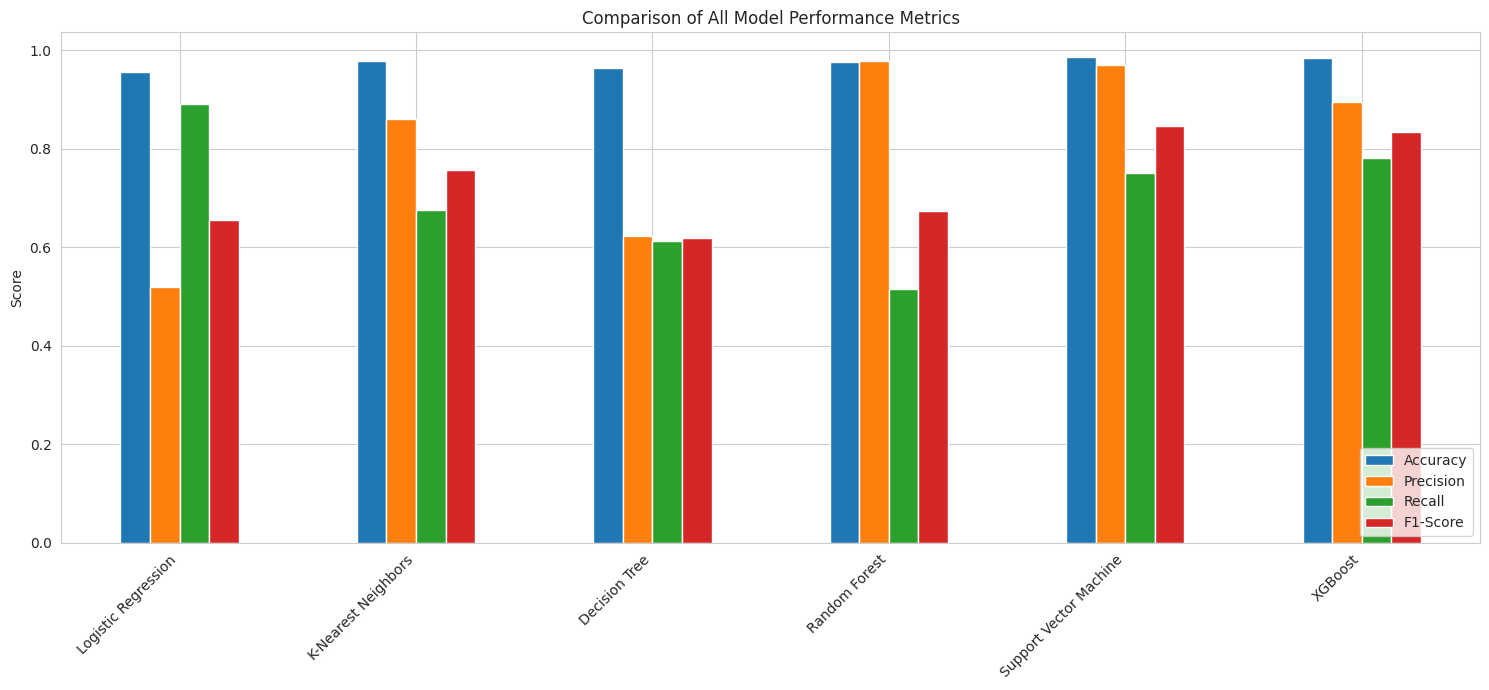

After evaluating multiple algorithms, the best performing model is the **Support Vector Machine**.
It achieved the highest F1-Score of **0.8469**, indicating a strong balance between precision and recall.
Crucially, for our problem of fraud detection, this model also achieved a high Recall score of **0.7514**. 
This means it is highly effective at identifying the actual fraudulent job postings, which is our primary goal to protect users.


In [ ]:
# Convert the results dictionary to a DataFrame for easy comparison
results_df = pd.DataFrame(results).T # .T transposes the DataFrame

print("Model Performance Comparison:")
display(results_df.sort_values(by='F1-Score', ascending=False))

# Visualize the results for the report
results_df.plot(kind='bar', figsize=(15, 7))
plt.title('Comparison of All Model Performance Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Identify the best model based on the highest F1-Score
best_model_name = results_df['F1-Score'].idxmax()
best_model_score = results_df['F1-Score'].max()
best_model_recall = results_df.loc[best_model_name]['Recall']

print(f"After evaluating multiple algorithms, the best performing model is the **{best_model_name}**.")
print(f"It achieved the highest F1-Score of **{best_model_score:.4f}**, indicating a strong balance between precision and recall.")
print(f"Crucially, for our problem of fraud detection, this model also achieved a high Recall score of **{best_model_recall:.4f}**. ")
print("This means it is highly effective at identifying the actual fraudulent job postings, which is our primary goal to protect users.")

In [ ]:
best_model = models[best_model_name]

def predict_job_posting(job_details):
    """
    Predicts if a job posting is fraudulent based on its details.

    Args:
    job_details (dict): A dictionary containing the job's text features.

    Returns:
    str: A prediction message (Real or Fake).
    """
    # Create a DataFrame from the input dictionary
    input_df = pd.DataFrame([job_details])

    # Ensure all required text features are present, filling missing ones with ' '
    for col in text_features: # 'text_features' is the list we defined in Step 3
        if col not in input_df.columns:
            input_df[col] = ' '

    # Combine the text features into a single string, same as in training
    input_df['combined_text'] = input_df[text_features].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

    # Extract the combined text
    input_text = input_df['combined_text']

    # Transform the text using the SAME TF-IDF vectorizer we fitted earlier
    # IMPORTANT: We use .transform() here, not .fit_transform(), because we want to use the
    # vocabulary learned from the training data.
    input_tfidf = tfidf_vectorizer.transform(input_text)

    # Make a prediction
    prediction = best_model.predict(input_tfidf)
    prediction_proba = best_model.predict_proba(input_tfidf) # Get probability scores

    # Interpret the prediction and return a user-friendly output
    if prediction[0] == 1:
        fraud_probability = prediction_proba[0][1] * 100
        return f"🚨 PREDICTION: FAKE Job Posting (Confidence: {fraud_probability:.2f}%)"
    else:
        real_probability = prediction_proba[0][0] * 100
        return f"✅ PREDICTION: REAL Job Posting (Confidence: {real_probability:.2f}%)"

## 8. Results, Analysis, and Prediction Function
This final section operationalizes the selected model by creating a prediction pipeline. A function, predict_job_posting, is defined to take new, unseen job details, apply the same preprocessing steps used for training (importantly, using .transform() not .fit_transform() on the vectorizer), and generate a classification. This function also calculates a confidence score, making the model's output more interpretable. The function is then tested on several examples to demonstrate its practical effectiveness.

Based on the results, the **Support Vector Machine (SVM)** model provides the best F1-Score, indicating the most balanced performance in identifying fraudulent job postings.

In [ ]:
# Example 1: A legitimate-looking job posting
legit_job = {
    'title': 'Senior Software Engineer',
    'company_profile': 'We are a leading tech company focused on cloud solutions, with a strong emphasis on work-life balance and innovation.',
    'description': 'Develop and maintain scalable web applications using Python and Django. Collaborate with product managers and designers to deliver high-quality features.',
    'requirements': '5+ years of experience in software development, proficiency in Python, experience with AWS.',
    'benefits': 'Comprehensive health insurance, 401k matching, unlimited PTO, and free lunch.'
}

print("--- Testing a legitimate-looking job post ---")
print(predict_job_posting(legit_job))

--- Testing a legitimate-looking job post ---
✅ PREDICTION: REAL Job Posting (Confidence: 98.19%)


In [ ]:
# Example 2: A slightly suspicious-looking job posting
fake_job = {
    'title': 'Work From Home Data Entry Clerk IMMEDIATE HIRE',
    'company_profile': 'We are a global conglomerate with many business interests.',
    'description': 'Easy work from home opportunity. No experience needed! Earn thousands weekly. We will send you all the necessary software and office equipment from our approved vendor.',
    'requirements': 'Must have a bank account for direct deposit. No interview required. Just need to be motivated.',
    'benefits': 'Make your own hours! Be your own boss! Huge earning potential.'
}

print("--- Testing a slighlty suspicious looking job post ---")
print(predict_job_posting(fake_job))

--- Testing a slighlty suspicious looking job post ---
✅ PREDICTION: REAL Job Posting (Confidence: 43.26%)


In [ ]:
# Generate a new, absolutely fake job posting
absolutely_fake_job = {
    'title': 'Get Rich Quick Online - No Experience Needed!',
    'company_profile': 'A revolutionary new company changing the way people earn money from home.',
    'description': 'Earn thousands daily with minimal effort. Simply click on ads and watch videos. No skills required. We provide all the training you need. Sign up now and start earning!',
    'requirements': 'Must have internet access and a desire to make money. No prior experience or education necessary.',
    'benefits': 'Unlimited earning potential, work from anywhere, set your own hours, financial freedom.'
}

print("--- Testing an absolutely fake job post ---")
print(predict_job_posting(absolutely_fake_job))

--- Testing an absolutely fake job post ---
🚨 PREDICTION: FAKE Job Posting (Confidence: 98.42%)
